# Execution on a Real backend  with job parameters

REFERENCE : "Hello world" program in Qiskit : Bell state
        
    https://qiskit.org/documentation/intro_tutorial1.html

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,IBMQ, execute
from qiskit.visualization import *
from qiskit.tools import job_monitor


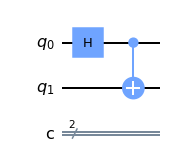

In [2]:
# Bell Quantum Circuit
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.draw(output="mpl")

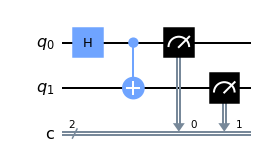

In [3]:
qc.measure([0,1],[0,1])
qc.draw(output="mpl")

In [4]:
#IBMQ.save_account('TOKEN ID needs to be provided')

#Load the  account
provider=IBMQ.load_account() 


provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [5]:

#Get the backend
backend=provider.get_backend('ibmq_bogota')

#Execute the circuit on the backend
job=execute(qc,backend,shots=1024)

### status:
1. job status :  status of the job 

2. backend status : status of the backend
https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.status.html#qiskit.providers.ibmq.IBMQBackend.status

In [6]:
job.status()

<JobStatus.VALIDATING: 'job is being validated'>

In [7]:
backend.status()

### job_monitor(): Monitors the status of a job
https://qiskit.org/documentation/stubs/qiskit.tools.job_monitor.html#qiskit.tools.job_monitor

In [8]:
job_monitor(job)

Job Status: job has successfully run


In [9]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [10]:
#Obtain the result
result=job.result()

#get and print the counts
counts=result.get_counts()
print(counts)

{'00': 504, '01': 29, '10': 41, '11': 450}


### Note: Real backend has noise which is provided by the states 01 and 10 with some counts

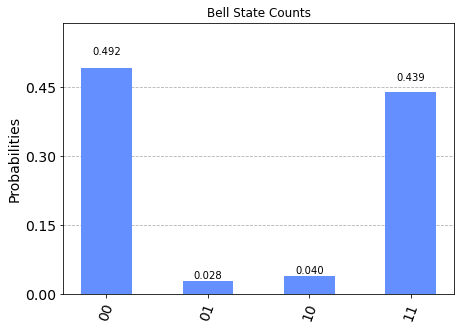

In [11]:
plot_histogram(counts,title="Bell State Counts")

# Methods associated with the job 

### job_id(): retrieves the job id 

In [12]:
job.job_id()

'61e4deb4fde78b7accdbd0f4'

### backend(): retrieves the information of the backend on which job was run

In [13]:
job.backend()

<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>

### result() :provides information of the result from the circuit run

In [14]:
job.result()

Result(backend_name='ibmq_bogota', backend_version='1.6.17', qobj_id='438a85ea-29a9-4afc-b054-036bf2b2597d', job_id='61e4deb4fde78b7accdbd0f4', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 504, '0x1': 29, '0x2': 41, '0x3': 450}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-0', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-01-17 11:15:16+08:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_bogota', backend_version='1.6.17'), execution_id='ada03fb0-7743-11ec-a709-b02628eaa3aa', time_taken=6.590203285217285, error=None, client_version={'qiskit': '0.31.0'})

### cancle(): cancels the job
EX: job.cancel()

### status(): gives the status of the job

In [15]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

# Backend 

## 1. Retrieve the job using the jb ID : retrieve_job(jobID)

In [17]:
jobID=job.job_id()
job_get=backend.retrieve_job(jobID)

In [18]:
job_get

In [19]:
job_get.result().get_counts(qc)



{'00': 504, '01': 29, '10': 41, '11': 450}

In [20]:
counts

{'00': 504, '01': 29, '10': 41, '11': 450}

## 2. List of previously submitted jobs : jobs()

In [21]:
backend.jobs()

In [22]:
## 3. List of unfinished jobs of the backend: active_jobs()

In [23]:
backend.active_jobs()

[]

In [24]:
## 4. No of jobs which can be submitted to the backend : remaining_jobs_count()

In [25]:
backend.remaining_jobs_count()

5

## additional
## status of the backend : status

In [26]:
backend.status()

## name of the backend : name()

In [27]:
backend.name()

'ibmq_bogota'

## provider for the backend: provider()

In [28]:
backend.provider()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>